In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the data set

In [93]:
df = pd.read_csv('Dataset/dataset.csv')


# Step 2: Tidy dataset by dropping irrelevant columns

In [94]:
# Droping irrelevant columns
df.drop(columns=['index'], inplace=True)

# Separate features and target variable
X = df.drop(columns=['Result'])  # Features
y = df['Result']  # Target

In [95]:
#Display the first 5 rows of the dataset
df.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [96]:
# Handle missing values
X.fillna(X.median(), inplace=True)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [98]:
df.max(axis=0)

having_IPhaving_IP_Address     1
URLURL_Length                  1
Shortining_Service             1
having_At_Symbol               1
double_slash_redirecting       1
Prefix_Suffix                  1
having_Sub_Domain              1
SSLfinal_State                 1
Domain_registeration_length    1
Favicon                        1
port                           1
HTTPS_token                    1
Request_URL                    1
URL_of_Anchor                  1
Links_in_tags                  1
SFH                            1
Submitting_to_email            1
Abnormal_URL                   1
Redirect                       1
on_mouseover                   1
RightClick                     1
popUpWidnow                    1
Iframe                         1
age_of_domain                  1
DNSRecord                      1
web_traffic                    1
Page_Rank                      1
Google_Index                   1
Links_pointing_to_page         1
Statistical_report             1
Result    

# Step 3: Splitting the data into test train sets

In [99]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [100]:
# Define parameter grid
param_grid = {
    'max_depth': [8, 10, 12, 15, 20],
    'n_estimators': [200, 300],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 3]
}

In [101]:
# Initialize RandomForest Model 
model = RandomForestClassifier(random_state=42, n_jobs=-1) 

In [102]:
# Perform Grid Search
from sklearn.model_selection import GridSearchCV


# Perform Grid Search with 5-fold Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get Best Parameters and Best Accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [103]:
print("Best Parameters Found:", best_params)
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Best Parameters Found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation Accuracy: 0.9695


# Train The model with best params

In [104]:
# Train the model with best parameters
best_model = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=300, n_jobs=-1,
                       random_state=42)

In [105]:
# Make Predictions
y_pred = best_model.predict(X_test)


# Step 4: Evaluate model

In [106]:
# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Test Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Final Test Accuracy: 0.9679
              precision    recall  f1-score   support

          -1       0.98      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [107]:
import joblib
joblib.dump(best_model, 'Trained_Models/Final_Grid_model1.pkl')  # Save model in scikit-learn 1.6.1
print("Model Trained and Saved")

Model Trained and Saved


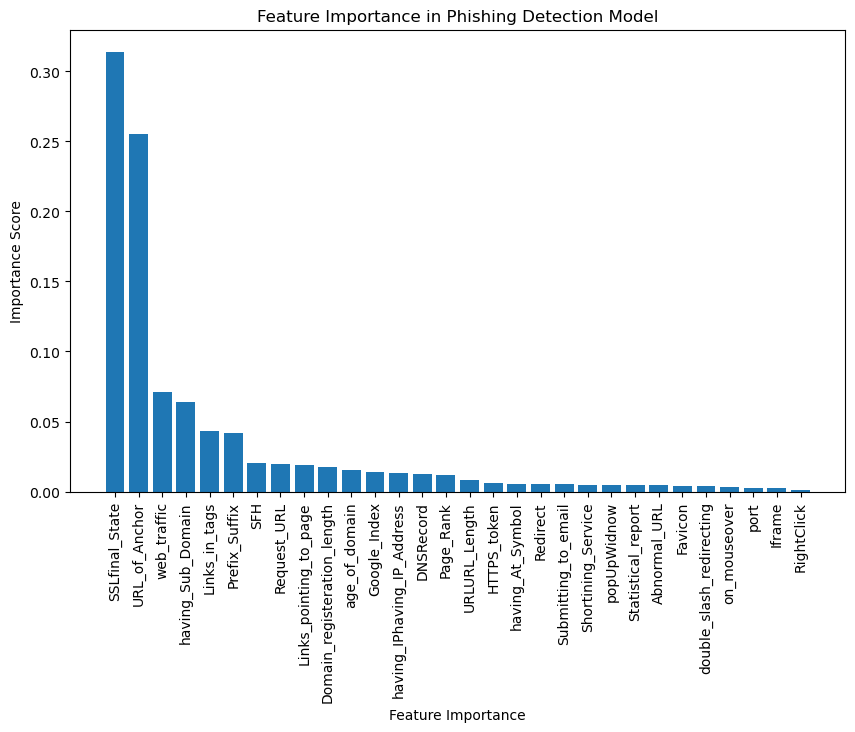

In [108]:
import matplotlib.pyplot as plt

# Get feature importance from the trained model
feature_importance = best_model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align="center")
plt.xticks(range(len(feature_importance)), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel("Feature Importance")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Phishing Detection Model")
plt.show()


In [109]:
print(df['Result'].value_counts())


Result
 1    6157
-1    4898
Name: count, dtype: int64
